In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
from neighborhood import Circle
from matplotlib.patches import Circle

In [120]:
def no_cortan(barrier1, barrier2):
    det1 = (barrier1[0][0] - barrier2[0][0])*(barrier1[1][1] - barrier2[0][1]) - (barrier1[1][0] - barrier2[0][0])*(barrier1[0][1] - barrier2[0][1])
    det2 = (barrier1[0][0] - barrier2[1][0])*(barrier1[1][1] - barrier2[1][1]) - (barrier1[1][0] - barrier2[1][0])*(barrier1[0][1] - barrier2[1][1])
    
    det3 = (barrier2[0][0] - barrier1[0][0])*(barrier2[1][1] - barrier1[0][1]) - (barrier2[1][0] - barrier1[0][0])*(barrier2[0][1] - barrier1[0][1])
    det4 = (barrier2[0][0] - barrier1[1][0])*(barrier2[1][1] - barrier1[1][1]) - (barrier2[1][0] - barrier1[1][0])*(barrier2[0][1] - barrier1[1][1])

    return (det1*det2 >= 0) or (det3*det4 >= 0)

def cortan(barrier1, barrier2):
    return not(no_cortan(barrier1, barrier2))

def divide_segment(barrier):
    A = np.array(barrier[0])
    B = np.array(barrier[1])

    M = (A+B)/ 2
    
    return np.array([B, M])

def ve(punto, segmento):
    barrera1 = [punto, segmento[0]]
    flag1 = all([no_cortan(barrera1, barrera) for barrera in segments])
    barrera2 = [punto, segmento[1]]
    flag2 = all([no_cortan(barrera2, barrera) for barrera in segments])

    return flag1 | flag2

def interseccion_long(punto, segmento):
    
    B1 = np.array(segmento[0])
    B2 = np.array(segmento[1])
    
    dr = B2 - B1
    nr = np.array([-dr[1], dr[0]])
    
    nr_u = nr / np.linalg.norm(nr)
    
    A = nr_u[0]
    B = nr_u[1]
    C = -A*B1[0] - B*B1[1]
    
    # r : Ax + By + C = 0

    # Sustituyendo: A*(punto[0] + landa*nr_u[0]) + B*(punto[1] + landa*nr_u[1]) + C = 0
    
    # landa(A*nr_u[0] + B*nr_u[1]) = -C - A*punto[0] - B*punto[1]
    
    # landa = (-C - A*punto[0] - B*punto[1])/(A*nr_u[0] + B*nr_u[1])
    P = punto + (-C-A*punto[0] - B*punto[1])/(A*nr_u[0] + B*nr_u[1])*nr_u
    
    landa1 = (np.linalg.norm(P-B1))/(np.linalg.norm(B1-B2))
    landa2 = (np.linalg.norm(P-B2))/(np.linalg.norm(B1-B2))
    
    long = min(landa1, landa2)*np.linalg.norm(dr)
    return long

def d_PB(punto, segmento):
    
    B1 = np.array(segmento[0])
    B2 = np.array(segmento[1])
    dr = B2 - B1
    A = -dr[1]
    B = dr[0]
    C = -A*B1[0] - B*B1[1]
    
    return np.abs(A*punto[0] + B*punto[1] + C)/np.sqrt(A**2 + B**2)

In [125]:
np.random.seed(2)

nS = 100

nP = 50

V = np.random.uniform(0, 100, (nP, 2))


segments = []
Circles = []

# while (nS >= 0):
#     new_segment = np.random.uniform(0, 100, (2, 2))
#     A = np.array(new_segment[0][:])
#     B = np.array(new_segment[1][:])
    
#     r = np.linalg.norm(A - B)
    
#     if r <= 20 and r >= 5:
#         for segment in segments:
#             while cortan(new_segment, segment):
#                 new_segment = divide_segment(new_segment)


#         segments.append(new_segment)
#         nS -= 1    

for v in V:
    r_min = min([interseccion_long(v, barrera) for barrera in segments if ve(v, barrera)])
    upper_bound = min(r_min, min([d_PB(v, barrera) for barrera in segments]))
    radii = np.random.uniform(upper_bound, upper_bound)
    Circles.append(Circle(center = v, radii = radii))
#     bolas.append([v[0], v[1], radii])
# r = 0
# radii = np.random.uniform(r*5, (r+1)*5, nP)
# Circles = [Circle(center = [V[i][0], V[i][1]], radii = radii[i]) for i in range(nP)]

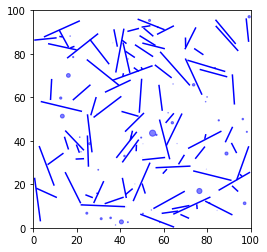

In [126]:
fig, ax = plt.subplots()
plt.axis([0, 100, 0, 100])
ax.set_aspect('equal')

for segment in segments:
    ax.plot([segment[0][0], segment[1][0]], [segment[0][1], segment[1][1]], c = 'blue')
    
for Circle in Circles:
    ax.add_artist(Circle.figura)